# **Introduction**

The dataset contains data from two different hotels. One Resort hotel and one City hotel.
From the publication (https://www.sciencedirect.com/science/article/pii/S2352340918315191) we know that both hotels are located in Portugal (southern Europe) ("H1 at the resort region of Algarve and H2 at the city of Lisbon"). The distance between these two locations is ca. 280 km by car and both locations border on the north atlantic.

<br> **Objective :**
<br> Developed a predictive model to classify the probability of hotel bookings being cancelled.

**Step**

1. Data Understanding
2. Data Preparation
3. Modeling
4. Evaluasi 
4. Recomendation

# **Libraries and Datasets**

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import matplotlib.dates as mdates
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



sns.set_theme(style="darkgrid")

In [ ]:
#!pip install plotly==5.8.2

## Load Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dibimbing.id/Dataset/hotel_bookings.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


## Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Terdapat 32 fitur yang terdiri dari 20 data numerik dan 12 data non-numerik**

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Overview of the attributes:




*   `hotel` : Hotel (H1 = Resort Hotel or H2 = City Hotel)
*   `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
*   `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*   `arrival_date_year` : Year of arrival date
*   `arrival_date_month` : Month of arrival date
*   `arrival_date_week_number` : Week number of year for arrival date
*   `arrival_date_day_of_month : Day of arrival date` :
*   `stays_in_weekend_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `stays_in_week_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `adults` :  Number of adults
*   `children` :  Number of children
*   `babies ` :  Number of babies
*   `meal` : Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package; 
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)

*   `country ` : Country of origin. Categories are represented in the ISO 3155–3:2013 format
*   `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
*   `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
*   `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
*   `reserved_room_type` : Code of room type reserved. Code is presented instead of designation for anonymity reasons
*   `assigned_room_type` : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
*   `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*   `deposit_type` : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

*   `agent` : ID of the travel agency that made the booking
*   `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*   `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
*   `customer_type` : Type of booking, assuming one of four categories:
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking

*   `adr` : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*   `required_car_parking_spaces` : Number of car parking spaces required by the customer
*   `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
*   `reservation_status` : Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why

*   `reservation_status_date` : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




## Check Null and Missing Values

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data_missing_value = df.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0.0005]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


Terdapat 4 fitur yang memiliki missing value

# Data Preparation

In [ ]:
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


##  Handle Missing Values 

**company**

In [ ]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [ ]:
# karena jumlah missing value pada fitur company lebih dari 80% dari keseluruhan data maka fitur ini akan di drop
df = df.drop(['company'], axis=1)

**agent**

In [ ]:
df[['agent']].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
90.0         1
213.0        1
444.0        1
446.0        1
247.0        1
Length: 333, dtype: int64

Karena fitur agent merupakan ID dari agent maka dapat diasumsikan bahwa nan value adalah booking hotel tanpa menggunakan agent. sehingga dapat di isi dengan No Agent

In [ ]:
# ubah type data ke str
df['agent'].fillna(0, inplace=True)
df['agent'] = df['agent'].astype('int')
agent_id = "A-" + df['agent'].astype(str)
df.insert(loc=24, column='agent_id', value=agent_id)
df['agent_id'].replace('A-0', 'No Agent', inplace=True)


**Country**

In [ ]:
df[['country']].value_counts()

country
PRT        48590
GBR        12129
FRA        10415
ESP         8568
DEU         7287
           ...  
MLI            1
MMR            1
MRT            1
SMR            1
PYF            1
Length: 177, dtype: int64

In [ ]:
# karena fitur country berisikan negara asal dari tamu yang melakukan booking hotel maka nan value akan diisi dengan others
df['country'].replace(np.nan, 'others', inplace=True)

**children**

In [ ]:
# karena childern adalah jumlah tamu anak-anak. maka kita isi nilai nan dengan 0. dengan asumsi bahwa tamu pada pemesanan tidak ada anak-anak
df['children'].replace(np.nan, 0, inplace=True)
df['children'] = df['children'].astype('int')

##  Handle Another Missing Values 

  

### **Numerical Features**
mencari kemungkinan nilai 0 adalah missing value dari fitur numerik

**Jumlah Tamu Dalam Hotel**

Karena dalam proses pemesanan hotel tidak mungkin terjadi jumlah tamu sama dengan nol dari fitur `adults` , `children` dan `babies`. jika terdapat jumlah tamu sama dengan nol maka ada di drop data tersebut,

In [ ]:
df[((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))].head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,agent_id,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0,No Agent,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0,No Agent,0,Transient,0.0,0,0,Check-Out,2015-10-12


In [ ]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

**Jumlah malam menginap**

Sama halnya dengan tamu dalam pemesanan hotel tidak mungkin ada jumlah menginap sama dengan nol. jadi data akan di drop jika ada

In [ ]:
df[((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))].head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,agent_id,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,No Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,No Agent,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df = df[~((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))]

**Fitur ADR (biaya kamar per malam)**

In [ ]:
df[((df['adr'] == 0))].head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,agent_id,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,0,No Agent,0,Transient,0.0,0,1,Check-Out,2015-07-05
421,Resort Hotel,1,57,2015,July,29,15,0,2,2,...,No Deposit,305,A-305,0,Transient-Party,0.0,0,0,Canceled,2015-07-13


untuk kasus ini missing value akan di isi dengan nilai median dari adr. karena distribusi data dari fitur adr tidak berdistribusi normal (Right-Skewed) 

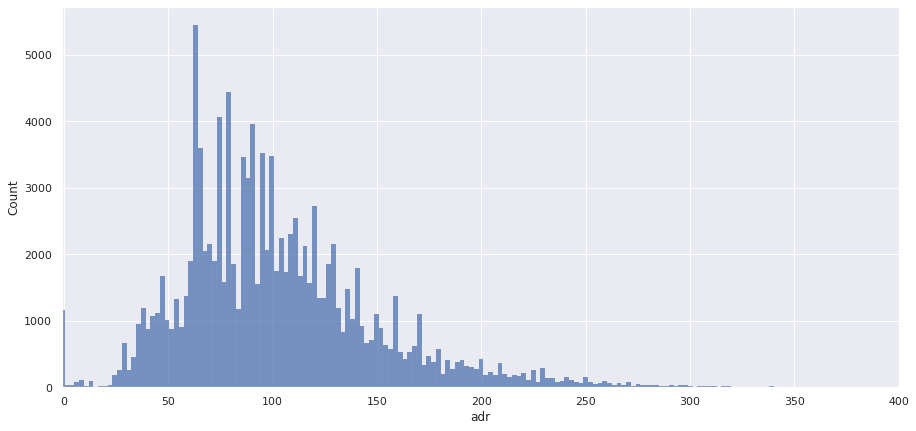

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x="adr")
ax.set_xlim(-1,400)
plt.show()

In [ ]:
df['adr'].describe()

count    118565.000000
mean        102.523809
std          50.005542
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
median_adr = df['adr'].median()
df['adr'] = df['adr'].replace({ 0 : median_adr})
# df = df[~((df['adr'] < 0))]

### **Categorical Features**
mencari kemungkinan nilai Undefined adalah missing value dari fitur categorical

**meal**

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

**Berdasarkan pada sumber data dalam artikel bahwa Undifined pada fitur meal sama dengan SC.**

In [ ]:
df['meal'] = df['meal'].replace({ 'Undefined' : 'SC'})

**`market_segment` dan `distribution_channel`**

In [ ]:
temp = ['market_segment','distribution_channel']
for column in df[temp]:
    print(f"============= {column} =================")
    print(df[column].unique())
    print()

============= market_segment =================
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

============= distribution_channel =================
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']



**Nilai Undefined pada fitur tersebut akan diisi dengan nilai yang paling banyak muncul (mode) pada masing-masing fitur**

In [ ]:
mode_ms = df['market_segment'].mode()
mode_dc = df['distribution_channel'].mode()
print(mode_ms)
print(mode_dc)

0    Online TA
dtype: object
0    TA/TO
dtype: object


In [ ]:
df['market_segment'] = df['market_segment'].replace({ 'Undefined' : 'Online TA'})
df['distribution_channel'] = df['distribution_channel'].replace({ 'Undefined' : 'TA/TO'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

## Pre-Processing & EDA

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    print(df[column].value_counts())
    print()

============= hotel =================
City Hotel      78899
Resort Hotel    39666
Name: hotel, dtype: int64

============= is_canceled =================
0    74389
1    44176
Name: is_canceled, dtype: int64

============= lead_time =================
0      6007
1      3386
2      2042
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

============= arrival_date_year =================
2016    56235
2017    40510
2015    21820
Name: arrival_date_year, dtype: int64

============= arrival_date_month =================
August       13812
July         12586
May          11704
October      11064
April        11045
June         10891
September    10477
March         9716
February      7998
November      6712
December      6689
January       5871
Name: arrival_date_month, dtype: int64

============= arrival_date_week_number =================
33    3564
30    3067
32    3029
34    3029
18    2910
28    2828
2

### **Numerical Features**

In [ ]:
numericals =  ['lead_time', 'stays_in_weekend_nights',
               'stays_in_week_nights', 'adults', 'children', 'babies',
               'previous_cancellations', 'previous_bookings_not_canceled', 
               'booking_changes', 'days_in_waiting_list', 'adr', 
               'required_car_parking_spaces','total_of_special_requests']

numerical = pd.concat([df[numericals], df['is_canceled']], axis=1)

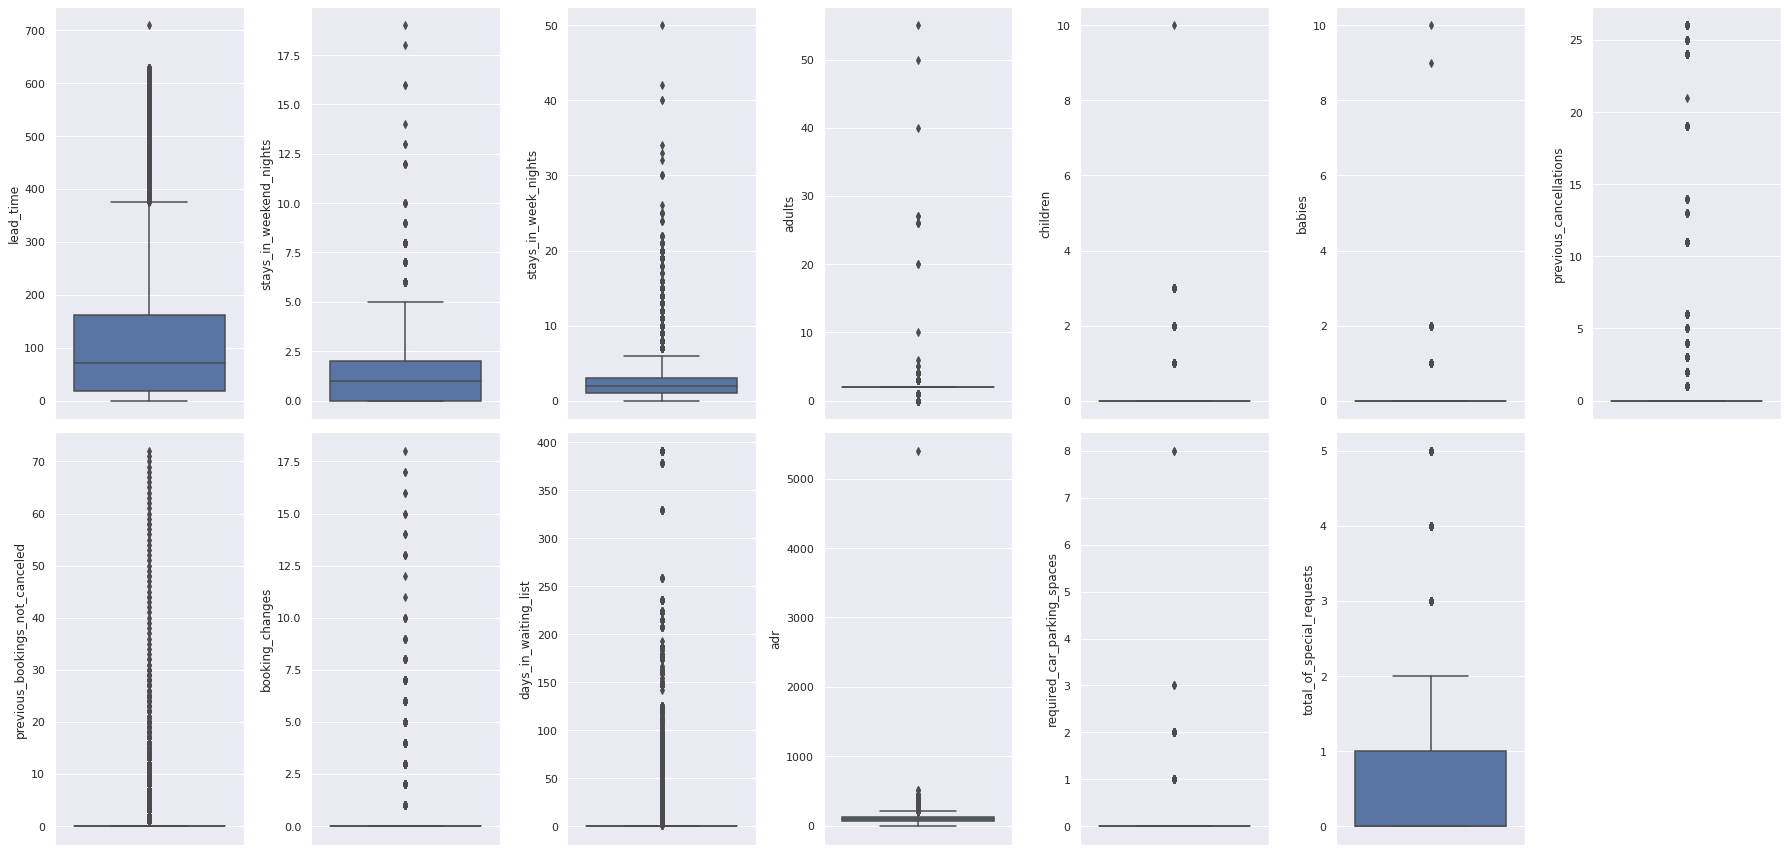

In [ ]:
plt.figure(figsize=(25, 12))

for i in range(0, len(numericals)):
  plt.subplot(2, 7, i+1)
  sns.boxplot(y=df[numericals[i]])
  plt.tight_layout()

**there are outliers in every numeric feature**

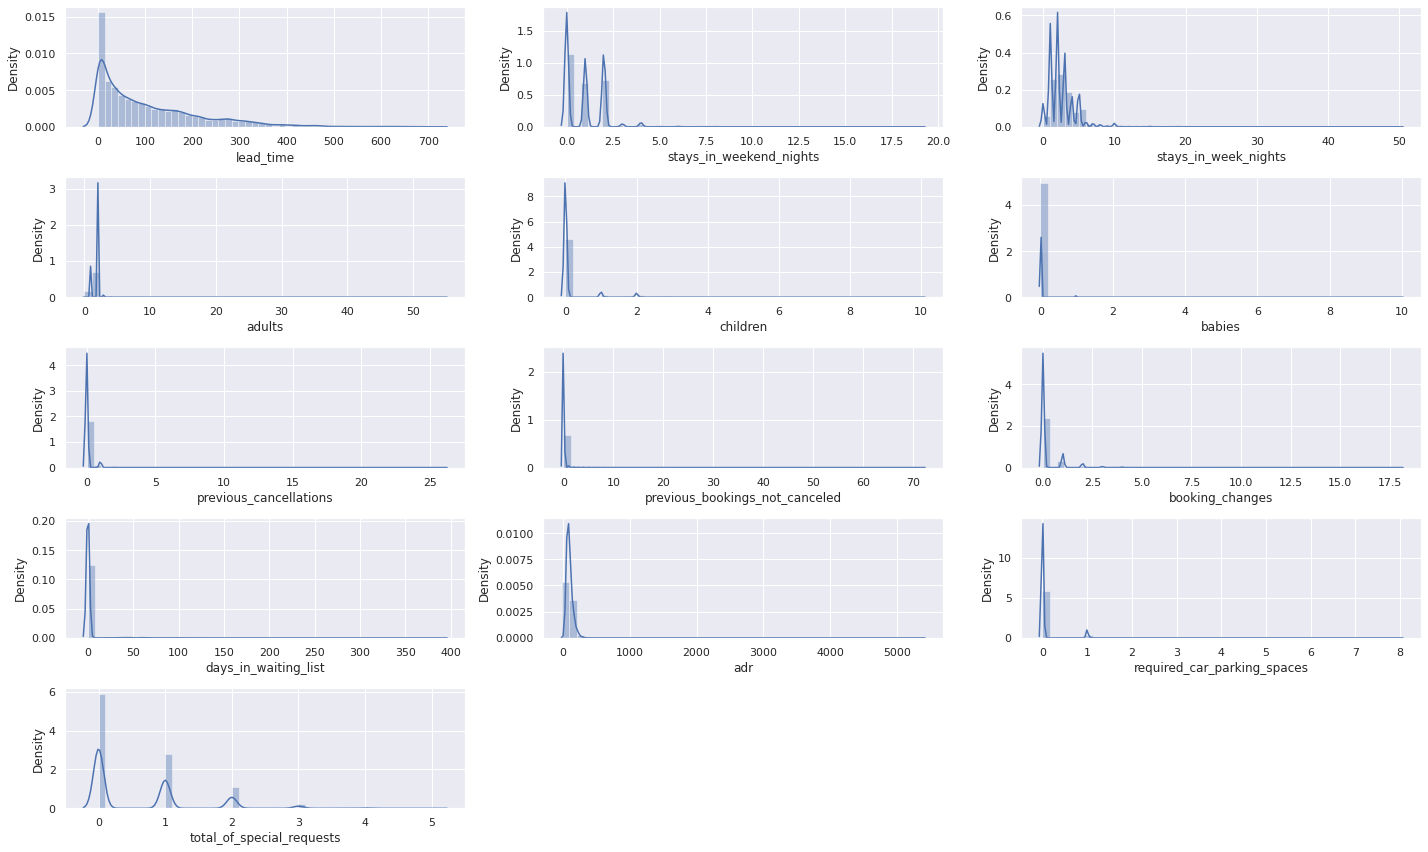

In [ ]:
plt.figure(figsize=(20, 12))

for i in range(0, len(numericals)):
  plt.subplot(5, 3, i+1)
  sns.distplot(x=df[numericals[i]])
  plt.xlabel(numericals[i])
  plt.tight_layout()

**most numerical features have a skewed distribution**

In [ ]:
# sns.pairplot(numerical, hue='is_canceled')

### **Lead Time**

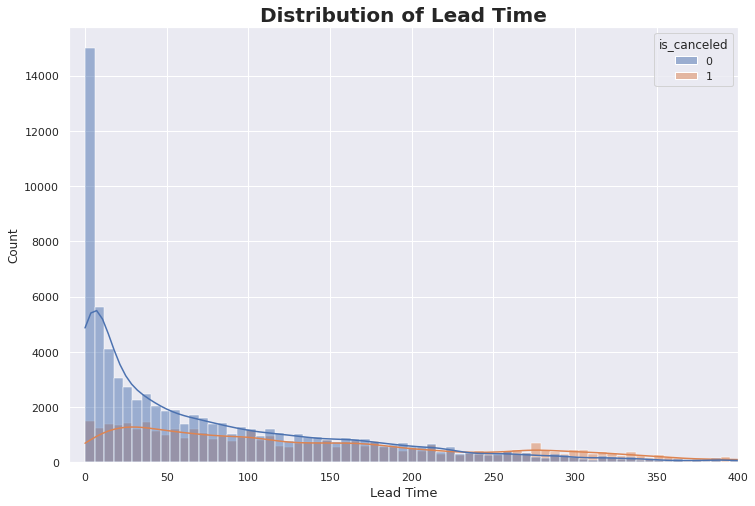

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
             x='lead_time', 
             hue='is_canceled', 
             kde=True,
             ax=ax)

ax.set_title('Distribution of Lead Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Lead Time', fontsize=13, fontweight='normal')
ax.set_xlim(-10, 400)
# ax.set_ylim(-1, 2000)

plt.show(fig)

**Longer lead time are less likely to cancel hotel bookings**

### **ADR**

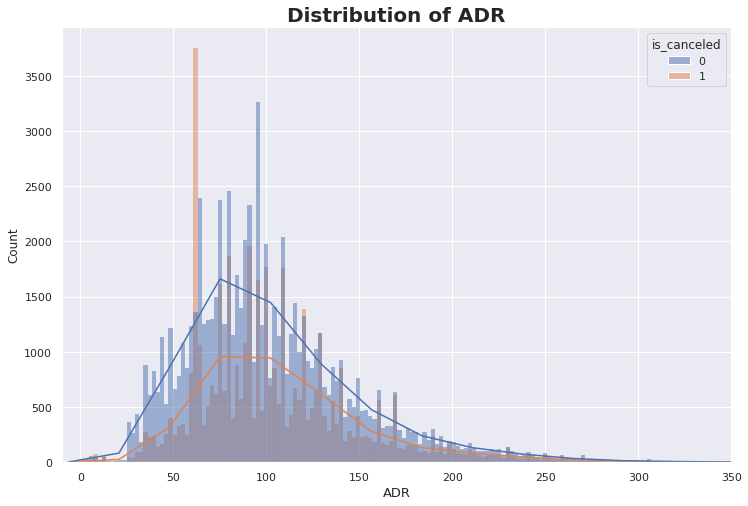

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
             x='adr', 
             hue='is_canceled', 
             kde=True,
             ax=ax)

ax.set_title('Distribution of ADR', fontsize=20, fontweight='bold')
ax.set_xlabel('ADR', fontsize=13, fontweight='normal')
ax.set_xlim(-10, 350)

plt.show(fig)

**most guest spend between 50 to 150 euros**

### **Is Canceled**
0 : No 
<br> 1: Yes

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='is_login', data=df, palette='coolwarm')
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.35, patch_height+100))
plt.show()

NameError: ignored


### **Repeated guest**
0 : No 
<br> 1: Yes

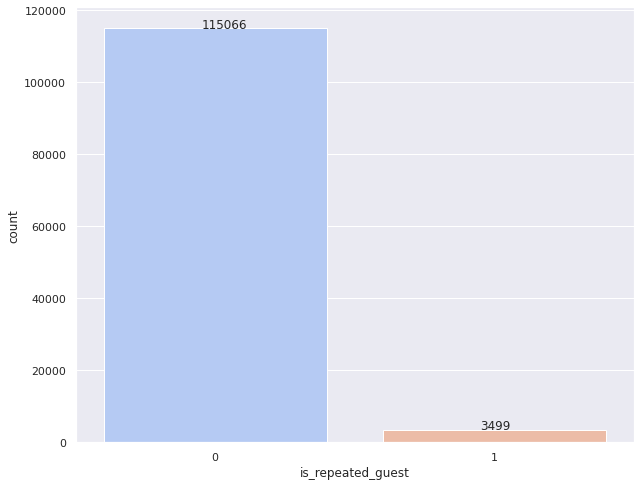

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='is_repeated_guest', data=df, palette='coolwarm')
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.35, patch_height+100))
plt.show()

In [ ]:
df_c = df.groupby(['is_repeated_guest', 'is_canceled']).size().reset_index()
df_c['percentage'] = df.groupby(['is_repeated_guest', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_c.columns = ['is_repeated_guest', 'is_canceled', 'Counts', 'Percentage']

df_c['is_canceled'] = df_c['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')
df_c['is_repeated_guest'] = df_c['is_repeated_guest'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_c, x='is_repeated_guest', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_c['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Hotel**

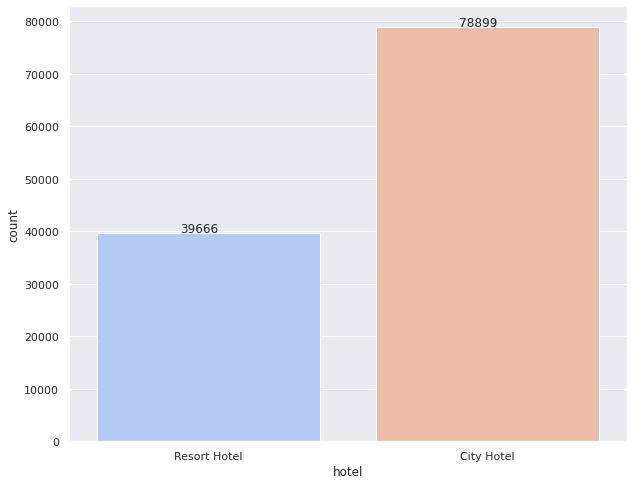

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='hotel', data=df, palette='coolwarm')
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

In [ ]:
df_h = df.groupby(['hotel', 'is_canceled']).size().reset_index()
df_h['percentage'] = df.groupby(['hotel', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_h.columns = ['hotel', 'is_canceled', 'Counts', 'Percentage']
df_h = df_h.sort_values(by='hotel', ascending=False)
df_h['is_canceled'] = df_h['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_h, x='hotel', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_h['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.show()

### **Meal**

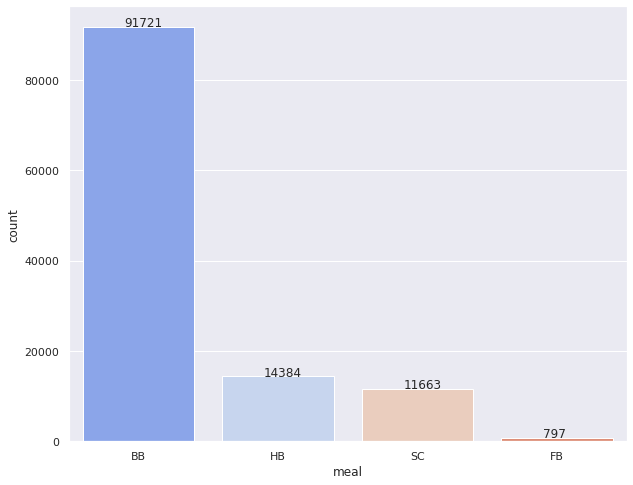

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='meal', data=df, palette='coolwarm', order = df['meal'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

In [ ]:
df_m = df.groupby(['meal', 'is_canceled']).size().reset_index()
df_m['percentage'] = df.groupby(['meal', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_m.columns = ['meal', 'is_canceled', 'Counts', 'Percentage']
df_m['is_canceled'] = df_m['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_m, x='meal', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_m['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Market Segment**

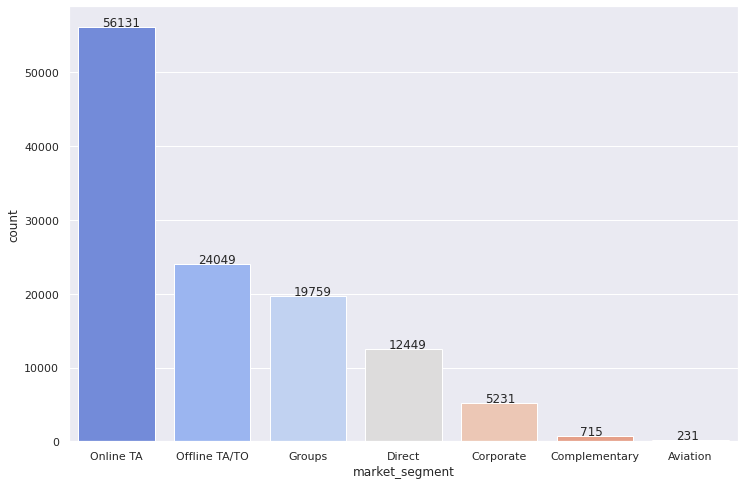

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.countplot(x='market_segment', data=df, palette='coolwarm', order = df['market_segment'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.25, patch_height+100))
plt.show()

In [ ]:
df_mg = df.groupby(['market_segment', 'is_canceled']).size().reset_index()
df_mg['percentage'] = df.groupby(['market_segment', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_mg.columns = ['market_segment', 'is_canceled', 'Counts', 'Percentage']
df_mg['is_canceled'] = df_mg['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_mg, x='market_segment', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_mg['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

- Online TA is the most used market segment by customers.
- But groups is the market segment that has the most cancellations of hotel booking when compared to the others



### **Distribution Channel**

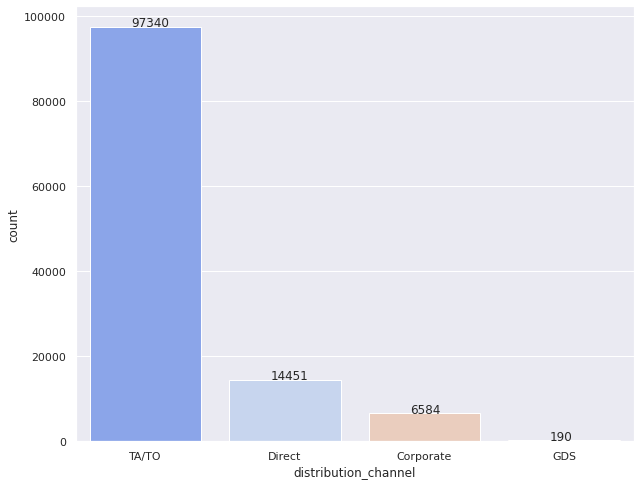

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='distribution_channel', data=df, palette='coolwarm', order = df['distribution_channel'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

In [ ]:
df_dc = df.groupby(['distribution_channel', 'is_canceled']).size().reset_index()
df_dc['percentage'] = df.groupby(['distribution_channel', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_dc.columns = ['distribution_channel', 'is_canceled', 'Counts', 'Percentage']
df_dc['is_canceled'] = df_dc['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_dc, x='distribution_channel', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_dc['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

- TA/TO is the most used distribution channel by customers.
- But also have high hotel booking cancellations.

### **Reserved Room Type**

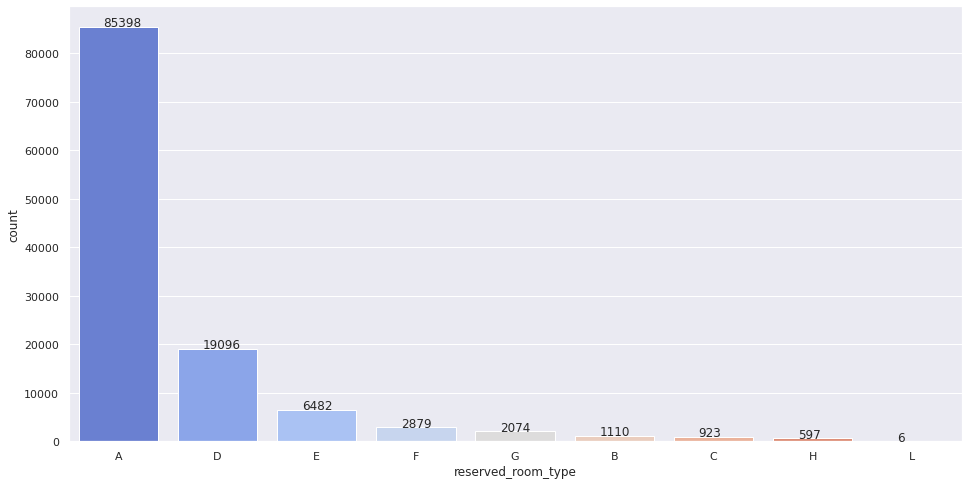

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.countplot(x='reserved_room_type', data=df, palette='coolwarm', order = df['reserved_room_type'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.25, patch_height+100))
plt.show()

In [ ]:
df_rr = df.groupby(['reserved_room_type', 'is_canceled']).size().reset_index()
df_rr['percentage'] = df.groupby(['reserved_room_type', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_rr.columns = ['reserved_room_type', 'is_canceled', 'Counts', 'Percentage']
df_rr['is_canceled'] = df_rr['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_rr, x='reserved_room_type', y='Counts', 
       color='is_canceled',
       width=1100, 
       height=700,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_rr['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Assigned Room Type**

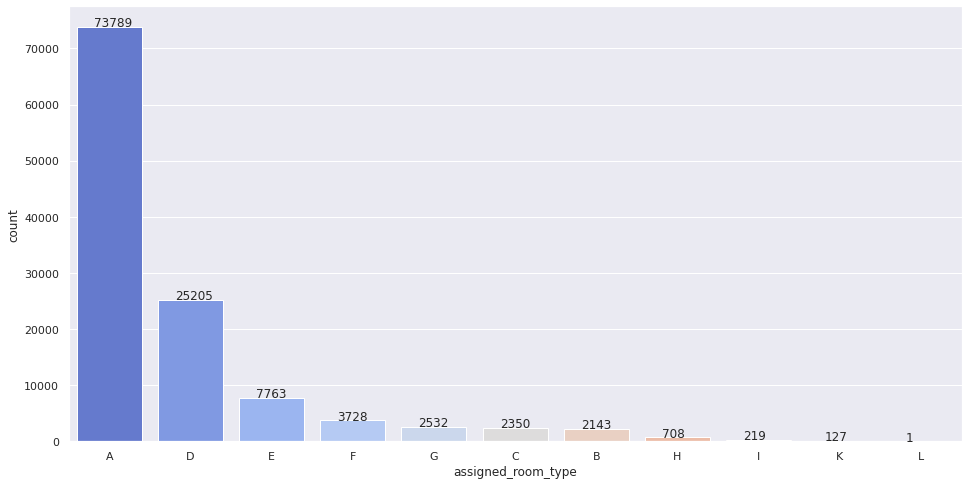

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.countplot(x='assigned_room_type', data=df, palette='coolwarm', order = df['assigned_room_type'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.21, patch_height+100))
plt.show()

In [ ]:
df_ar = df.groupby(['assigned_room_type', 'is_canceled']).size().reset_index()
df_ar['percentage'] = df.groupby(['assigned_room_type', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_ar.columns = ['assigned_room_type', 'is_canceled', 'Counts', 'Percentage']
df_ar['is_canceled'] = df_ar['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_ar, x='assigned_room_type', y='Counts', 
       color='is_canceled',
       width=1100, 
       height=700,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_ar['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Deposit Type**

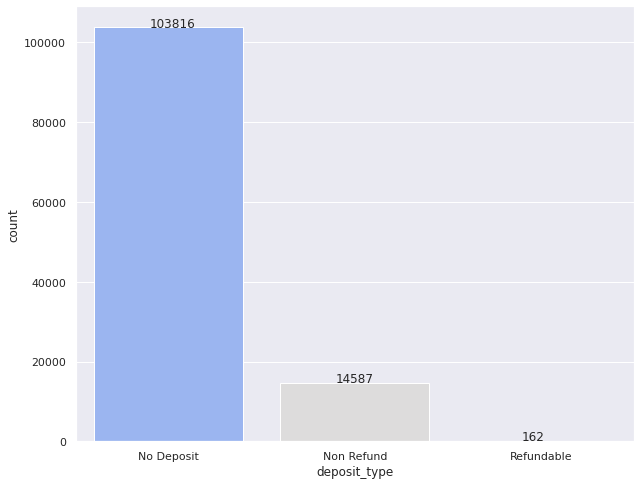

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='deposit_type', data=df, palette='coolwarm', order = df['deposit_type'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

In [ ]:
df_dt = df.groupby(['deposit_type', 'is_canceled']).size().reset_index()
df_dt['percentage'] = df.groupby(['deposit_type', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_dt.columns = ['deposit_type', 'is_canceled', 'Counts', 'Percentage']
df_dt['is_canceled'] = df_dt['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_dt, x='deposit_type', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_dt['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

- Almost all of non-refundable deposit type cancel hotel reservations.
- This is good for us because there is income even though there is a cancellation

### **Customer Type**

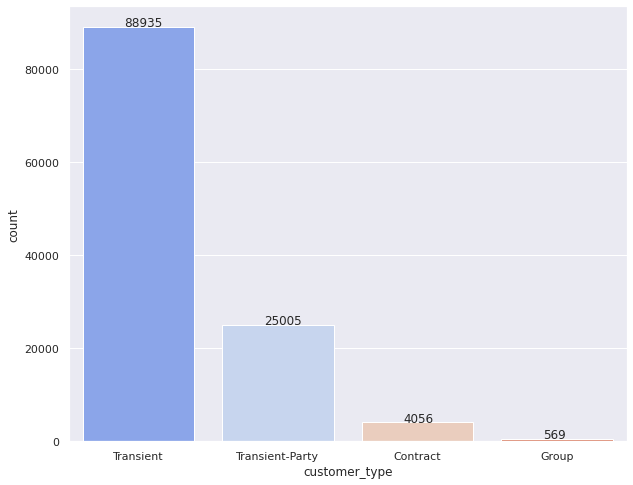

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='customer_type', data=df, palette='coolwarm', order = df['customer_type'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

In [ ]:
df_ct = df.groupby(['customer_type', 'is_canceled']).size().reset_index()
df_ct['percentage'] = df.groupby(['customer_type', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_ct.columns = ['customer_type', 'is_canceled', 'Counts', 'Percentage']
df_ct['is_canceled'] = df_ct['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_ct, x='customer_type', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_ct['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Country**

In [ ]:
df_c = df.groupby('country').agg(number_of_booking = ('country', 'count')).sort_values('number_of_booking', ascending=False).reset_index()
total_guest = df_c['number_of_booking'].sum()
df_c['booking_in_percent'] = round(df_c["number_of_booking"] / total_guest * 100, 2)
df_c 

,country,number_of_booking,booking_in_percent
0,PRT,47943,40.44
1,GBR,12095,10.20
2,FRA,10389,8.76
3,ESP,8544,7.21
4,DEU,7285,6.14
...,...,...,...
173,NCL,1,0.00
174,SDN,1,0.00
175,NIC,1,0.00
176,NPL,1,0.00


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(df_c, locations = df_c['country'],
                           color = df_c['booking_in_percent'], hover_name = df_c['country'])
guests_map.show()

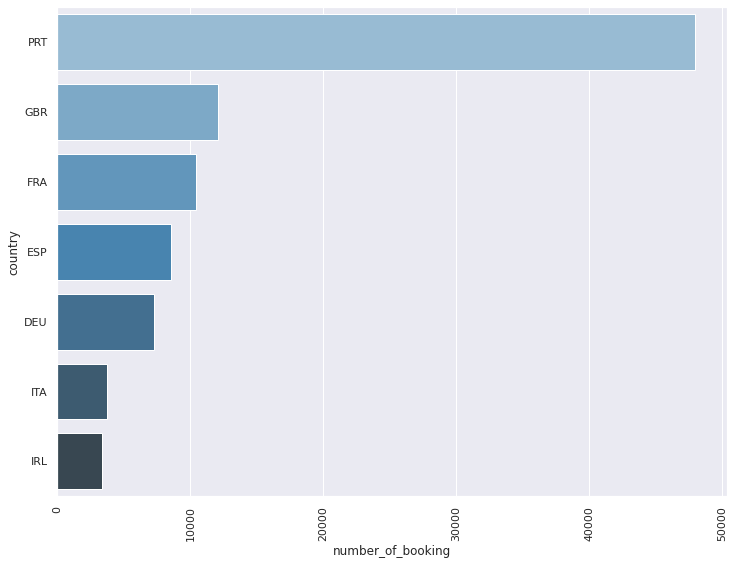

In [ ]:
plt.figure(figsize=(12, 9))
sns.barplot(data=df_c.head(7), y='country', x='number_of_booking', palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

### **Agent ID**

In [ ]:
df['agent_id'].describe()

count     118565
unique       334
top          A-9
freq       31855
Name: agent_id, dtype: object

In [ ]:
data_agent = df['agent_id'].value_counts().reset_index()
data_agent.columns = ['agent_id','value']
data_agent['percentage'] = round((data_agent['value']/len(df['agent_id']))*100,2)
data_agent = data_agent.sort_values('percentage', ascending=False).reset_index(drop=True)
data_agent = data_agent[data_agent['percentage'] >= 1]
data_agent

,agent_id,value,percentage
0,A-9,31855,26.87
1,No Agent,16079,13.56
2,A-240,13795,11.63
3,A-1,7185,6.06
4,A-14,3620,3.05
5,A-7,3519,2.97
6,A-6,3249,2.74
7,A-250,2857,2.41
8,A-241,1705,1.44
9,A-28,1639,1.38


Dari total 333 agent-id(tidak termasuk no-agent) hanya terdapat 12 agent-id yang memiliki persentase transaksi pemesanan hotel lebih dari 1%. diluar dari 12 agent-id tersebut kita akan kategorikan kedalam agent-id lainnya (Others)

In [ ]:
df['agent_id_temp'] = df['agent_id']

In [ ]:
def agent(col):
    ls = ['A-9', 'No Agent', 'A-240', 'A-1', 'A-14', 'A-7', 'A-6', 'A-250', 'A-241', 'A-28', 'A-8', 'A-3','A-37',]
          # 'A-19','A-40','A-314','A-21','A-229','A-242','A-83','A-29', 'A-171']
    if col not in ls:
      return 'Others'
    return col

In [ ]:
df['agent_id_temp'] = df['agent_id_temp'].apply(agent)

In [ ]:
data_agent_temp = df['agent_id_temp'].value_counts().reset_index()
data_agent_temp.columns = ['agent_id_temp','value']
data_agent_temp['percentage'] = round((data_agent_temp['value']/len(df['agent_id_temp']))*100,2)
data_agent_temp = data_agent_temp.sort_values('percentage', ascending=False).reset_index(drop=True)
data_agent_temp = data_agent_temp[data_agent_temp['percentage'] >= 1]
data_agent_temp

,agent_id_temp,value,percentage
0,A-9,31855,26.87
1,Others,28998,24.46
2,No Agent,16079,13.56
3,A-240,13795,11.63
4,A-1,7185,6.06
5,A-14,3620,3.05
6,A-7,3519,2.97
7,A-6,3249,2.74
8,A-250,2857,2.41
9,A-241,1705,1.44


Others agent memiliki total transaksi pemesanan hotel sebanyak 28998 (24% dari total pemesanan) yang terdiri dari 321 agent. jika dirata-rata dari tiap agent hanya memiliki sekitar 90 (0.075%) transaksi pemesanan hotel. angka yang cukup rendah dibandingkan dengan agent-agent lainnya. kita akan menetapkan 321 agent menjadi 1 yaitu other agent

In [ ]:
df_ai = df.groupby(['agent_id_temp', 'is_canceled']).size().reset_index()
df_ai['percentage'] = df.groupby(['agent_id_temp', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_ai.columns = ['agent_id_temp', 'is_canceled', 'Counts', 'Percentage']
df_ai['is_canceled'] = df_ai['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_ai, x='agent_id_temp', y='Counts', 
       color='is_canceled',
       width=1100, 
       height=700,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_ai['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
def w_agent(col):
    if col == 'No Agent':
      return 0
    else: 
      return 1

In [ ]:
df['with_agent'] = df['agent_id_temp'].apply(w_agent)

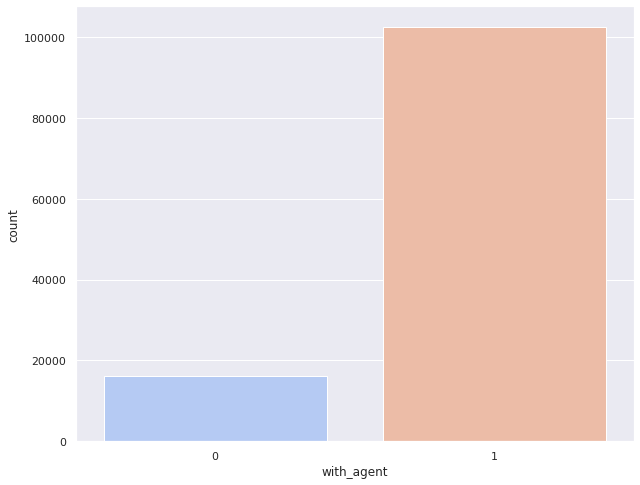

In [ ]:
sns.countplot(data=df, x='with_agent',palette='coolwarm')


In [ ]:
df_ai = df.groupby(['with_agent', 'is_canceled']).size().reset_index()
df_ai['percentage'] = df.groupby(['with_agent', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_ai.columns = ['with_agent', 'is_canceled', 'Counts', 'Percentage']
df_ai['is_canceled'] = df_ai['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_ai, x='with_agent', y='Counts', 
       color='is_canceled',
       width=600, 
       height=400,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_ai['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### **Deep-dive Exploration**

**How many hotel bookings are there per year?**
**and how much for each type of hotel?**

In [ ]:
df_y = df.groupby(['arrival_date_year', 'is_canceled']).size().reset_index()
df_y['percentage'] = df.groupby(['arrival_date_year', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_y.columns = ['arrival_date_year', 'is_canceled', 'Counts', 'Percentage']
df_y = df_y.sort_values(by='Counts', ascending=False)
df_y['is_canceled'] = df_y['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_y, x='arrival_date_year', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_y['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.show()

**There are more than 30% hotel booking cancellations every year**

In [ ]:
df_y = df[(df['hotel'] == 'Resort Hotel')].groupby(['arrival_date_year', 'is_canceled']).size().reset_index()
df_y['percentage'] = df[(df['hotel'] == 'Resort Hotel')].groupby(['arrival_date_year', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_y.columns = ['arrival_date_year', 'is_canceled', 'Counts', 'Percentage']
df_y = df_y.sort_values(by='Counts', ascending=False)
df_y['is_canceled'] = df_y['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_y, x='arrival_date_year', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_y['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.show()

In [ ]:
df_y = df[(df['hotel'] == 'City Hotel')].groupby(['arrival_date_year', 'is_canceled']).size().reset_index()
df_y['percentage'] = df[(df['hotel'] == 'City Hotel')].groupby(['arrival_date_year', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_y.columns = ['arrival_date_year', 'is_canceled', 'Counts', 'Percentage']
df_y = df_y.sort_values(by='Counts', ascending=False)
df_y['is_canceled'] = df_y['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_y, x='arrival_date_year', y='Counts', 
       color='is_canceled',
       width=800, 
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    }, 
    text=df_y['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.show()

**how long does the guest stay in the hotel?**

In [ ]:
df3 = df[(df['is_canceled'] == 0)]
df3['total_night'] = df3['stays_in_weekend_nights'] + df3['stays_in_week_nights']

In [ ]:
stay = df3.groupby(['total_night','hotel']).agg(number_of_guest = ('total_night', 'count')).reset_index()
stay = stay.sort_values('number_of_guest', ascending=False).head(15)

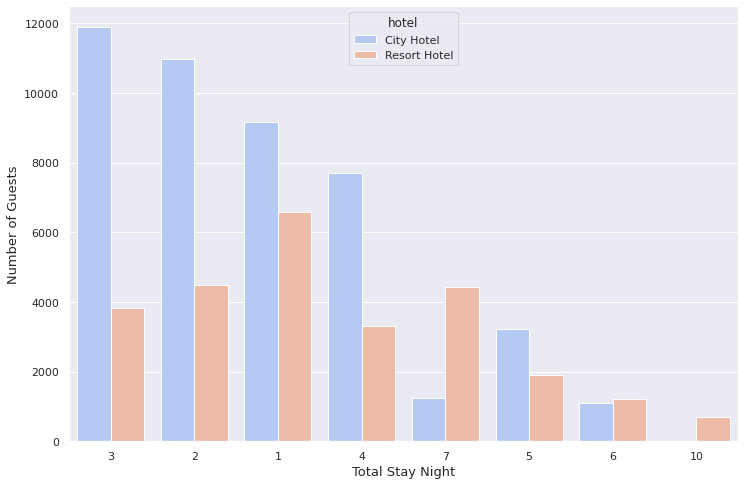

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=stay, x='total_night', y='number_of_guest', hue='hotel' ,palette='coolwarm', order = stay['total_night'].value_counts().index)

ax.set_xlabel('Total Stay Night', fontsize=13, fontweight='normal')
ax.set_ylabel('Number of Guests', fontsize=13, fontweight='normal')
plt.show()

**Which are the most busy month?**

In [ ]:
busy = df3.groupby(['arrival_date_month','hotel']).agg(number_of_guest = ('total_night', 'count')).reset_index()
busy = busy.sort_values('arrival_date_month', ascending=False)

busy['num_month'] = busy['arrival_date_month'].map({'January': 1, 'February': 2,'March': 3,'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                                                    'September': 9, 'October': 10, 'November': 11, 'December': 12}).astype('int')

busy = busy.sort_values(by='num_month')

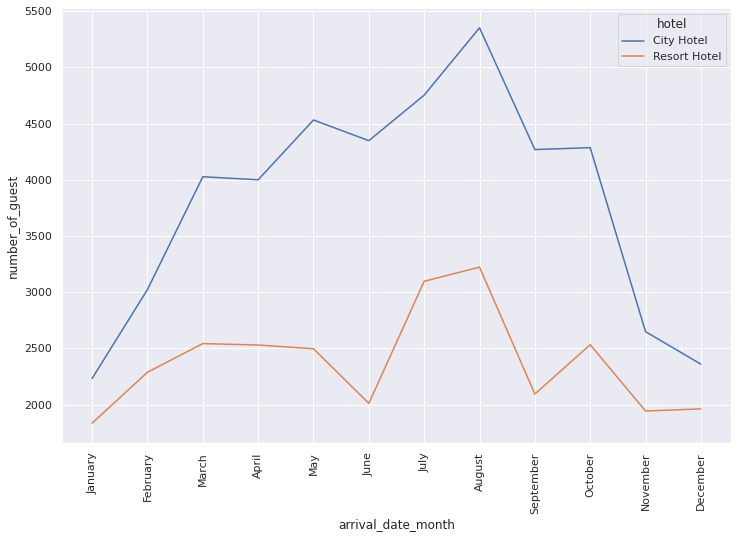

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=busy, x='arrival_date_month', y='number_of_guest', hue='hotel')
plt.xticks(rotation=90)

# ax.set_xlabel('Month', fontsize=13, fontweight='normal')
# ax.set_ylabel('Number of Guests', fontsize=13, fontweight='normal')
plt.show()

**Grouping Market Segment, Distribution Chanel and Deposit Type**

In [ ]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df['is_canceled']):
    
    fig,ax = plt.subplots(1,1,figsize = (20,7))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    #cat_grouped_by_cat_target.rename({ 1 :"% Book Cancel", 0 :"% Book Not Cancel"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["blue", "orange"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

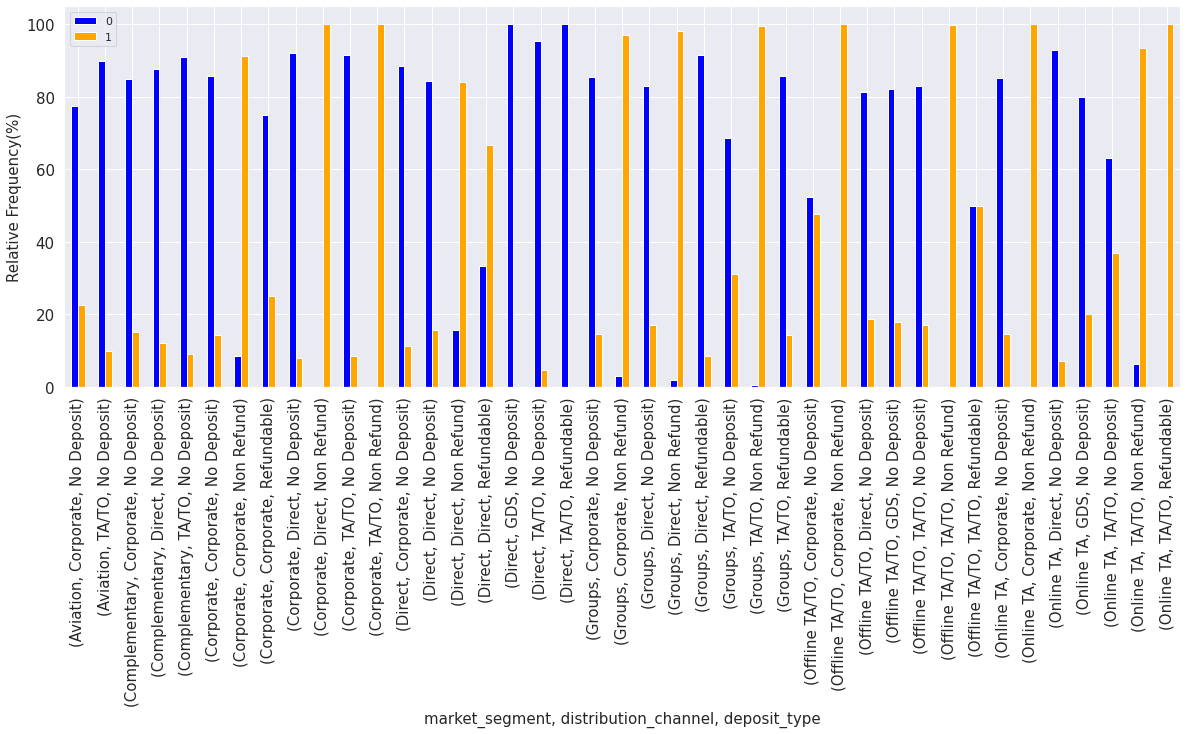

In [ ]:
multivariate_analysis(df['market_segment'], df['distribution_channel'], df['deposit_type'])

## Feature Selection

In [ ]:
hotel = df.copy()

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

**remove fitur `country` karena fitur tidak akan digunakan**

In [ ]:
hotel = hotel.drop(['country'],axis=1)

**These features will be taken out:**

* `arrival_date_year`
* `arrival_date_month`
* `arrival_date_week_number`
* `arrival_date_day_of_month`
* `reservation_status_date`

**fitur-fitur diatas akan diremove karena informasinya sudah tercover oleh lead_time**



In [ ]:
hotel = hotel.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status_date'], axis=1)

**`assigned_room_type` akan diremove karena sudah tecover oleh fitur  `reserved_room_type`**

In [ ]:
hotel = hotel.drop(['assigned_room_type'],axis=1)

**`agent` digantikan dengan `agent_id`**

In [ ]:
hotel['agent_id'] = hotel['agent_id_temp']
hotel = hotel.drop(['agent','agent_id_temp','with_agent'],axis=1)

**`reservation_status` sudah tercover oleh `is_canceled`**

In [ ]:
hotel = hotel.drop(['reservation_status'],axis=1)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   stays_in_weekend_nights         118565 non-null  int64  
 4   stays_in_week_nights            118565 non-null  int64  
 5   adults                          118565 non-null  int64  
 6   children                        118565 non-null  int64  
 7   babies                          118565 non-null  int64  
 8   meal                            118565 non-null  object 
 9   market_segment                  118565 non-null  object 
 10  distribution_channel            118565 non-null  object 
 11  is_repeated_guest               118565 non-null  int64  
 12  previous_cancell

## Feature Engineering

Label Encoding

In [ ]:
# Ecndoding categorical feature // Label Encoder
hotel['hotel'] = hotel['hotel'].map({'City Hotel': 0, 'Resort Hotel': 1}).astype('int')
hotel['meal'] = hotel['meal'].map({'SC': 0, 'BB': 1,'HB': 2,'FB': 3}).astype('int')
hotel['reserved_room_type'] = hotel['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8}).astype('int')
hotel['deposit_type'] = hotel['deposit_type'].map({'No Deposit': 0, 'Refundable': 1,'Non Refund': 2}).astype('int')
hotel['customer_type'] = hotel['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,1,0,7,0,1,1,0,0,1,Direct,...,0,0,0,0,No Agent,0,0,75.0,0,0
3,1,0,13,0,1,1,0,0,1,Corporate,...,0,0,0,0,Others,0,0,75.0,0,0
4,1,0,14,0,2,2,0,0,1,Online TA,...,0,0,0,0,A-240,0,0,98.0,0,1
5,1,0,14,0,2,2,0,0,1,Online TA,...,0,0,0,0,A-240,0,0,98.0,0,1
6,1,0,0,0,2,2,0,0,1,Direct,...,0,2,0,0,No Agent,0,0,107.0,0,0


One-hot Encoding

In [ ]:
onehot_columns = ['market_segment','distribution_channel', 'agent_id']
hotel = pd.get_dummies(hotel, columns = onehot_columns, drop_first=True)
hotel

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,agent_id_A-250,agent_id_A-28,agent_id_A-3,agent_id_A-37,agent_id_A-6,agent_id_A-7,agent_id_A-8,agent_id_A-9,agent_id_No Agent,agent_id_Others
2,1,0,7,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,13,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,14,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,14,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
119386,0,0,102,2,5,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
119387,0,0,34,2,5,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
119388,0,0,109,2,5,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  int64  
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   stays_in_weekend_nights         118565 non-null  int64  
 4   stays_in_week_nights            118565 non-null  int64  
 5   adults                          118565 non-null  int64  
 6   children                        118565 non-null  int64  
 7   babies                          118565 non-null  int64  
 8   meal                            118565 non-null  int64  
 9   is_repeated_guest               118565 non-null  int64  
 10  previous_cancellations          118565 non-null  int64  
 11  previous_bookings_not_canceled  118565 non-null  int64  
 12  reserved_room_ty

## Correlation Matrix

In [ ]:
all_features = ['hotel', 'meal', 'reserved_room_type', 'deposit_type', 'customer_type', 
                'lead_time', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'adults', 'children', 'babies',
                'is_repeated_guest', 'previous_cancellations', 'booking_changes',
                'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                'total_of_special_requests', 'is_canceled']

onehot_columns = ['market_segment','distribution_channel', 'agent_id_temp']
onehot_features = pd.get_dummies(df[onehot_columns], drop_first=True)
categorical_onehot_features = pd.concat([onehot_features, hotel['is_canceled']], axis=1)

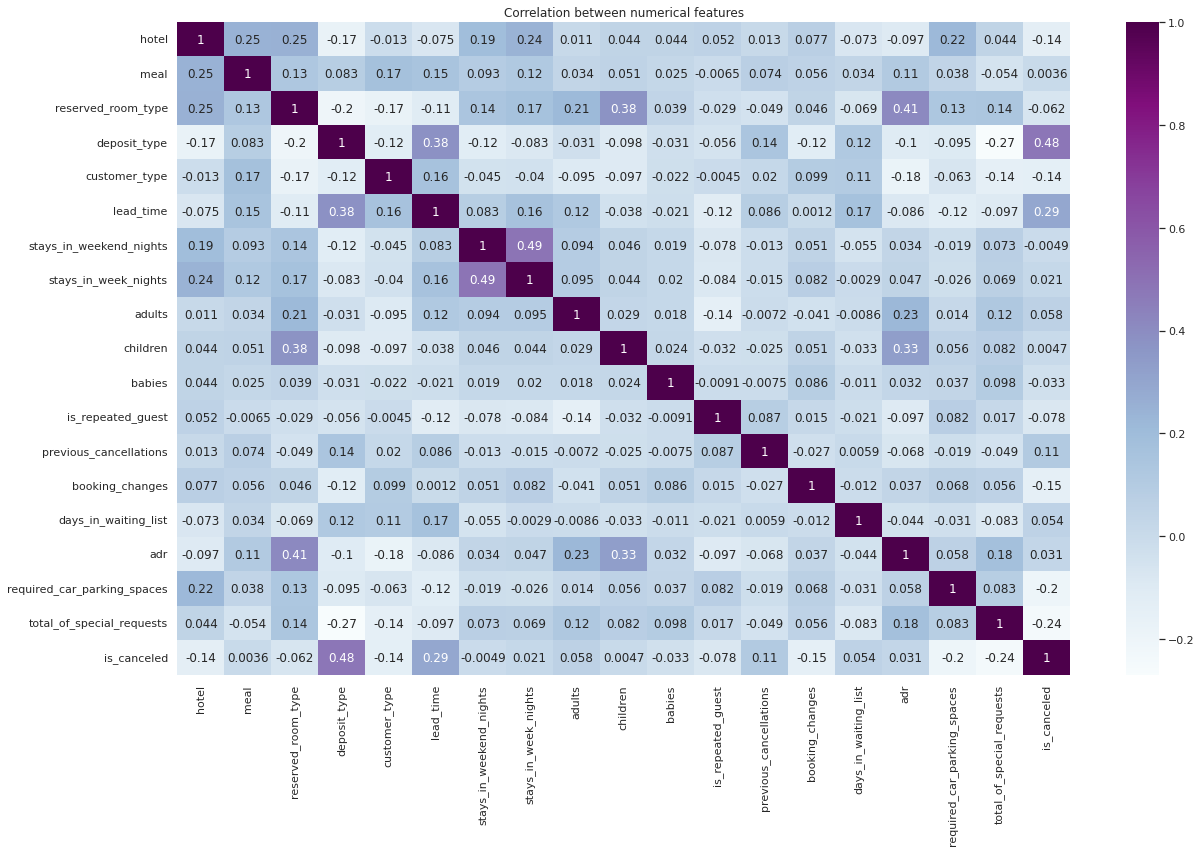

In [ ]:
all_corr = hotel[all_features].corr()

plt.figure(figsize = (20, 12))
sns.heatmap(all_corr, annot=True, cmap='BuPu')
plt.title('Correlation between numerical features')
plt.show()

In [ ]:
all_corr['is_canceled'].sort_values(ascending=False)

is_canceled                    1.000000
deposit_type                   0.480071
lead_time                      0.291515
previous_cancellations         0.109974
adults                         0.057575
days_in_waiting_list           0.053941
adr                            0.031102
stays_in_week_nights           0.020703
children                       0.004678
meal                           0.003603
stays_in_weekend_nights       -0.004859
babies                        -0.032672
reserved_room_type            -0.062458
is_repeated_guest             -0.077791
hotel                         -0.135652
customer_type                 -0.137187
booking_changes               -0.145198
required_car_parking_spaces   -0.196804
total_of_special_requests     -0.236165
Name: is_canceled, dtype: float64

**Correlation one-hot categorical features**

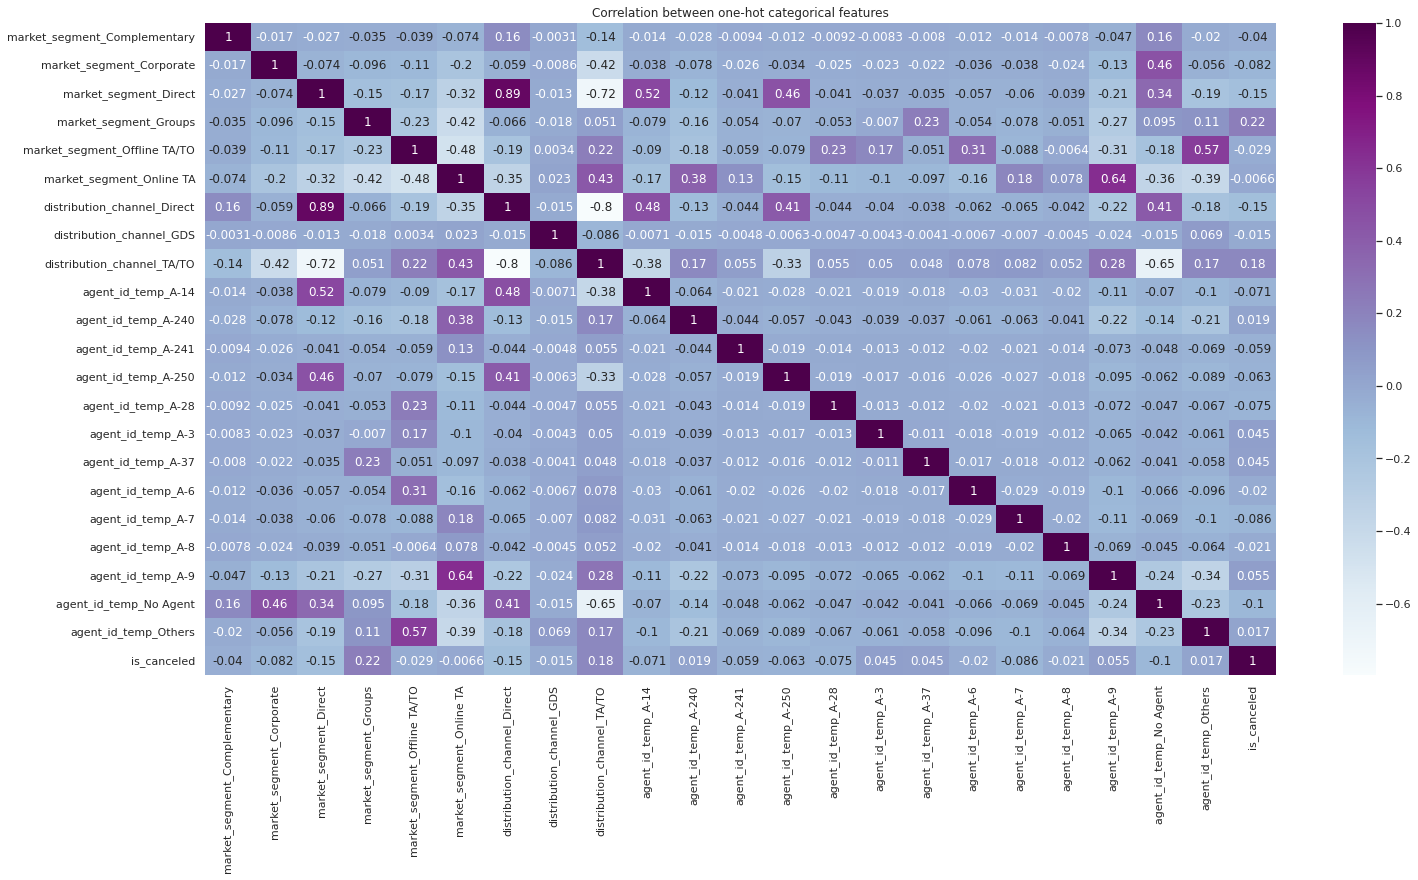

In [ ]:
onehot_corr = categorical_onehot_features.corr()

plt.figure(figsize = (24, 12))
sns.heatmap(onehot_corr, annot=True, cmap='BuPu')
plt.title('Correlation between one-hot categorical features')
plt.show()

In [ ]:
onehot_corr['is_canceled'].sort_values(ascending=False)

is_canceled                     1.000000
market_segment_Groups           0.221457
distribution_channel_TA/TO      0.175605
agent_id_temp_A-9               0.054591
agent_id_temp_A-3               0.045155
agent_id_temp_A-37              0.044706
agent_id_temp_A-240             0.018559
agent_id_temp_Others            0.017316
market_segment_Online TA       -0.006596
distribution_channel_GDS       -0.014737
agent_id_temp_A-6              -0.019826
agent_id_temp_A-8              -0.020584
market_segment_Offline TA/TO   -0.028606
market_segment_Complementary   -0.040422
agent_id_temp_A-241            -0.058649
agent_id_temp_A-250            -0.062848
agent_id_temp_A-14             -0.070749
agent_id_temp_A-28             -0.074803
market_segment_Corporate       -0.081548
agent_id_temp_A-7              -0.086052
agent_id_temp_No Agent         -0.101078
distribution_channel_Direct    -0.151129
market_segment_Direct          -0.154119
Name: is_canceled, dtype: float64

# Split Data

In [ ]:
final_data = hotel.copy()

In [ ]:
final_data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,agent_id_A-250,agent_id_A-28,agent_id_A-3,agent_id_A-37,agent_id_A-6,agent_id_A-7,agent_id_A-8,agent_id_A-9,agent_id_No Agent,agent_id_Others
2,1,0,7,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,13,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,14,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,14,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# split train test

X = final_data.drop(columns='is_canceled')
y = final_data[['is_canceled']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Handling Imbalanced Data

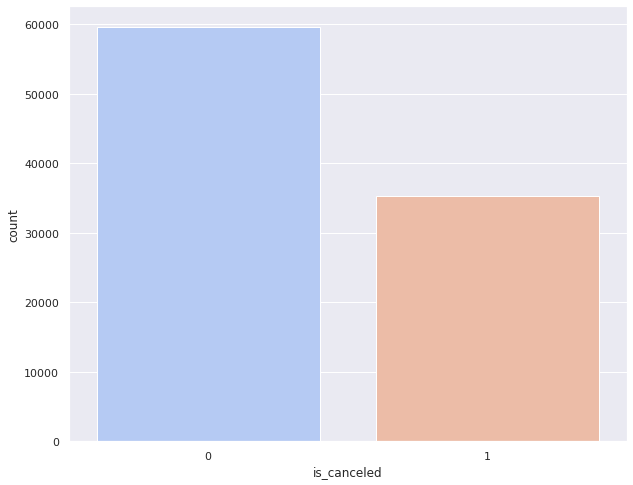

In [ ]:
sns.countplot(data=y_train, x='is_canceled', palette='coolwarm')

Because the number of target variables is not balanced, it will be handled with the undersample method.

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train['is_canceled']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, 
                                                        y_train)

# summarize class distribution
print(Counter(y_train_under['is_canceled']))

Counter({0: 59607, 1: 35245})
Counter({0: 35245, 1: 35245})


# Modeling

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 5)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(random_state = 42)
XGBoost = xgb.XGBClassifier(random_state=42)

classification = [KNN, DT, RF, XGBoost]

classifications = [KNeighborsClassifier(n_neighbors = 5),
                  DecisionTreeClassifier(),
                  RandomForestClassifier(random_state = 42),
                  xgb.XGBClassifier(random_state=42)                  
                  ]

model = pd.DataFrame(columns = ['Method', 'Precision', 'Recall', 'F1-Score', 'Accuracy','AOC'])
model

,Method,Precision,Recall,F1-Score,Accuracy,AOC


In [ ]:
for models in classification:
    models.fit(X_train_under, y_train_under)
    y_pred = models.predict(X_test)

    method = str(type(models)).split('.')[-1][:-2]
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall)/(precision + recall)
    acc = accuracy_score(y_test, y_pred)
    aoc = roc_auc_score(y_test, models.predict_proba(X_test)[:,1])

    model = model.append({'Method': method, 
                    'Precision': precision, 
                    'Recall': recall,
                    'F1-Score': f1,
                    'Accuracy': acc,
                    'AOC': aoc},
                     ignore_index=True)


In [ ]:
model

,Method,Precision,Recall,F1-Score,Accuracy,AOC
0,KNeighborsClassifier,0.621956,0.754899,0.682009,0.734871,0.824772
1,DecisionTreeClassifier,0.705871,0.799686,0.749856,0.799055,0.801102
2,RandomForestClassifier,0.782841,0.819393,0.800700,0.846371,0.921461
3,XGBClassifier,0.781878,0.692756,0.734624,0.811496,0.883105


Matrix used in the selection of the model by using the f1-score. <br>
**Random Forest** has a higher f1-score than the others

# Hyperparameters Tuning 

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (30,40,50,60),
    'max_depth':(15,20,25,30)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, n_jobs = -1, scoring='f1_micro')

rf_clf_gridcv.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': (15, 20, 25, 30),
                         'n_estimators': (30, 40, 50, 60)},
             scoring='f1_micro')

In [ ]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
14,"{'max_depth': 30, 'n_estimators': 50}",0.840559,1
15,"{'max_depth': 30, 'n_estimators': 60}",0.840375,2
13,"{'max_depth': 30, 'n_estimators': 40}",0.839850,3
11,"{'max_depth': 25, 'n_estimators': 60}",0.839367,4
10,"{'max_depth': 25, 'n_estimators': 50}",0.839112,5
12,"{'max_depth': 30, 'n_estimators': 30}",0.838871,6
9,"{'max_depth': 25, 'n_estimators': 40}",0.838303,7
8,"{'max_depth': 25, 'n_estimators': 30}",0.837580,8
7,"{'max_depth': 20, 'n_estimators': 60}",0.834416,9
6,"{'max_depth': 20, 'n_estimators': 50}",0.834090,10


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     14782
           1       0.79      0.82      0.80      8931

    accuracy                           0.85     23713
   macro avg       0.84      0.84      0.84     23713
weighted avg       0.85      0.85      0.85     23713



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
aoc = roc_auc_score(y_test, models.predict_proba(X_test)[:,1])
acc = accuracy_score(y_test, y_pred)
print('Assuming 1 as positive, we get:')
print('')
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)

print('')

precision = tp/(tp+fp)
recall = tp/(tp+fn)
    
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', 2 * (precision * recall)/(precision + recall))
print('Acuracy:', acc)
print('AOC:', aoc)

Assuming 1 as positive, we get:

True Positive: 7287
True Negative: 12799
False Positive: 1983
False Negative: 1644

Precision: 0.786084142394822
Recall: 0.8159220691971784
F1-Score: 0.8007252348772045
Acuracy: 0.847045924176612
AOC: 0.8831052917751954


**Tuned model has slightly better f1-score and accuracy than base model.**

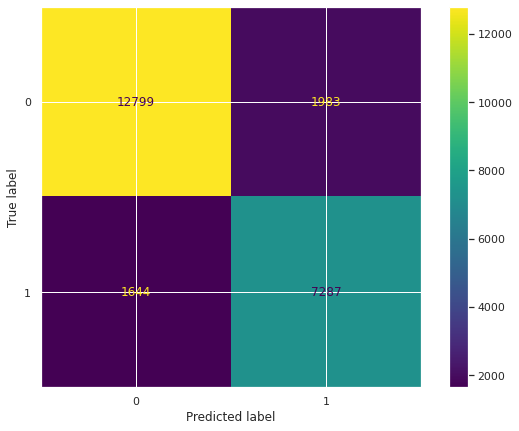

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

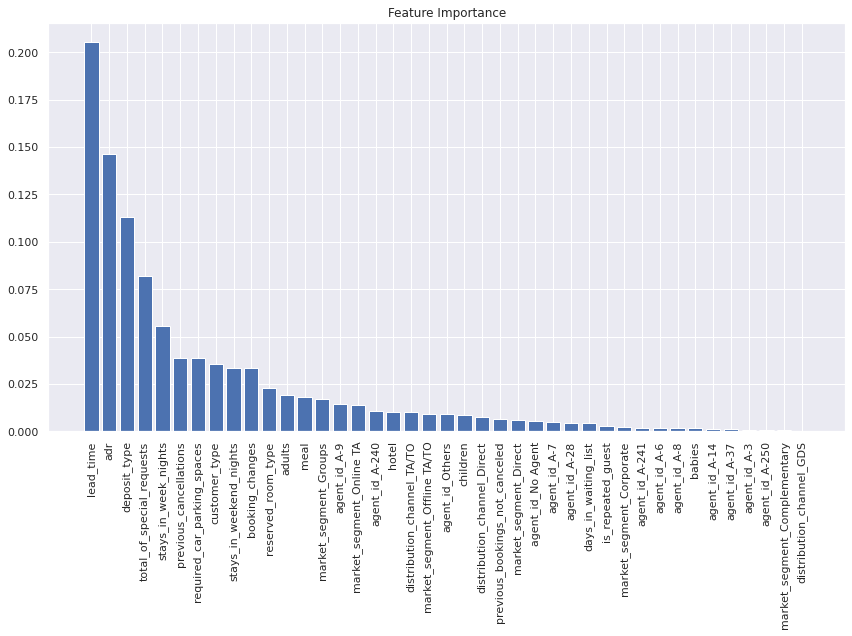

In [ ]:
importances = rf_clf_gridcv.best_estimator_.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Lead_time, adr, deposit_type,  total_of_special_request and stays_in_week_night are the 5 most important features in modeling**



# Recomendation

* Take advantage of the waiting list feature if there is a possibility of cancellation of hotel bookings.

* Implement a Non-Refundable ordering system for early bookers.

* Give more focus to the Online TA market segment and don't focus too much on the Group because if there is a cancellation there will be a cancellation on a fairly large scale